In [2]:
import tensorflow as tf
tf.random.set_seed(42)

## Load data

In [63]:
# Import the dataset loading function from sklearn
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
house_dataset = fetch_california_housing()

# Display the oringal data
house_dataset.keys()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name = 'MEDV')

# Visualize the first 5 samples of the data
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [64]:
# Split data into training and test dataset
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.2, random_state=42)

# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(data.shape))
print("\n--Shape of the target vector--\n {}".format(target.shape))
print("\n--Shape of the training data--\n {}".format(train_data.shape))
print("\n--Shape of the testing data--\n {}".format(test_data.shape))

--Shape of the whole data--
 (20640, 8)

--Shape of the target vector--
 (20640,)

--Shape of the training data--
 (16512, 8)

--Shape of the testing data--
 (4128, 8)


In [77]:
train_data.shape, test_data.shape

((16512, 8), (4128, 8))

In [65]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Data Preparation: normalization

In [66]:
def norm(x, mean, std):
    return (x - mean) / std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
normed_train_data = norm(train_data, mean, std)
normed_test_data = norm(test_data, mean, std)


## Build up an MLP

In [78]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[8]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Now try out the model. Take a batch of 5 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

array([[0.5631629 ],
       [0.39941972],
       [0.41509995],
       [0.5955348 ],
       [0.14164557]], dtype=float32)

In [80]:
# Customize the optimizer configuration (learning rate here)
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

### Train & test the model

In [83]:
model.fit(normed_train_data, train_targets, epochs=300, batch_size=1024, verbose=1)

Train on 16512 samples
Epoch 1/300
16512/16512 [==============================] - 0s 7us/sample - loss: 0.2905 - mae: 0.3708 - mse: 0.2905
Epoch 2/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2815 - mae: 0.3690 - mse: 0.2815
Epoch 3/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2856 - mae: 0.3706 - mse: 0.2856
Epoch 4/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2813 - mae: 0.3691 - mse: 0.2813
Epoch 5/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2750 - mae: 0.3635 - mse: 0.2750
Epoch 6/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2964 - mae: 0.3691 - mse: 0.2964
Epoch 7/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2774 - mae: 0.3683 - mse: 0.2774
Epoch 8/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2762 - mae: 0.3645 - mse: 0.2762
Epoch 9/300
16512/16512 [========================

16512/16512 [==============================] - 0s 5us/sample - loss: 0.2107 - mae: 0.3205 - mse: 0.2107
Epoch 140/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2078 - mae: 0.3178 - mse: 0.2078
Epoch 141/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2079 - mae: 0.3187 - mse: 0.2079
Epoch 142/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2220 - mae: 0.3172 - mse: 0.2220
Epoch 143/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2061 - mae: 0.3156 - mse: 0.2061
Epoch 144/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2080 - mae: 0.3160 - mse: 0.2080
Epoch 145/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2074 - mae: 0.3156 - mse: 0.2074
Epoch 146/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2048 - mae: 0.3143 - mse: 0.2048
Epoch 147/300
16512/16512 [==============================] - 0s 5us/sa

16512/16512 [==============================] - 0s 5us/sample - loss: 0.1852 - mae: 0.3016 - mse: 0.1852
Epoch 278/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1819 - mae: 0.2997 - mse: 0.1819
Epoch 279/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1832 - mae: 0.2998 - mse: 0.1832
Epoch 280/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1837 - mae: 0.3015 - mse: 0.1837
Epoch 281/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1862 - mae: 0.3033 - mse: 0.1862
Epoch 282/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1758 - mae: 0.2927 - mse: 0.1758
Epoch 283/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1886 - mae: 0.3061 - mse: 0.1886
Epoch 284/300
16512/16512 [==============================] - 0s 5us/sample - loss: 0.1794 - mae: 0.2963 - mse: 0.1794
Epoch 285/300
16512/16512 [==============================] - 0s 5us/sa

In [84]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

0.34268078

### Tune the number of epochs

In [102]:
# Train the model (in silent mode, verbose=0)

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[normed_train_data.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model = build_model()

EPOCHS=500
history = model.fit(normed_train_data, train_targets,
                    validation_split = 0.2,
                    epochs=EPOCHS, batch_size=1024, verbose=1)

Train on 13209 samples, validate on 3303 samples
Epoch 1/500
13209/13209 [==============================] - 1s 42us/sample - loss: 1.4886 - mae: 0.8468 - mse: 1.4886 - val_loss: 0.6993 - val_mae: 0.6000 - val_mse: 0.6993
Epoch 2/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.7160 - mae: 0.6110 - mse: 0.7160 - val_loss: 0.7024 - val_mae: 0.5821 - val_mse: 0.7024
Epoch 3/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.6125 - mae: 0.5666 - mse: 0.6125 - val_loss: 0.5329 - val_mae: 0.5602 - val_mse: 0.5329
Epoch 4/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.5127 - mae: 0.5192 - mse: 0.5127 - val_loss: 0.5228 - val_mae: 0.4993 - val_mse: 0.5228
Epoch 5/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.5282 - mae: 0.5197 - mse: 0.5282 - val_loss: 0.5199 - val_mae: 0.5461 - val_mse: 0.5199
Epoch 6/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.4674 - mae: 

Epoch 96/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.2572 - mae: 0.3513 - mse: 0.2572 - val_loss: 0.3222 - val_mae: 0.4055 - val_mse: 0.3222
Epoch 97/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2554 - mae: 0.3538 - mse: 0.2554 - val_loss: 0.3111 - val_mae: 0.3653 - val_mse: 0.3111
Epoch 98/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2592 - mae: 0.3522 - mse: 0.2592 - val_loss: 0.3358 - val_mae: 0.4198 - val_mse: 0.3358
Epoch 99/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2573 - mae: 0.3577 - mse: 0.2573 - val_loss: 0.3059 - val_mae: 0.3700 - val_mse: 0.3059
Epoch 100/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2631 - mae: 0.3533 - mse: 0.2631 - val_loss: 0.3622 - val_mae: 0.4303 - val_mse: 0.3622
Epoch 101/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2501 - mae: 0.3471 - mse: 0.2501 - val_loss: 0.3184 - 

13209/13209 [==============================] - 0s 7us/sample - loss: 0.2081 - mae: 0.3178 - mse: 0.2081 - val_loss: 0.3449 - val_mae: 0.3876 - val_mse: 0.3449
Epoch 191/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.2186 - mae: 0.3264 - mse: 0.2186 - val_loss: 0.3188 - val_mae: 0.3901 - val_mse: 0.3188
Epoch 192/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.1960 - mae: 0.3078 - mse: 0.1960 - val_loss: 0.4017 - val_mae: 0.4224 - val_mse: 0.4017
Epoch 193/500
13209/13209 [==============================] - ETA: 0s - loss: 0.2944 - mae: 0.3748 - mse: 0.294 - 0s 6us/sample - loss: 0.2209 - mae: 0.3284 - mse: 0.2209 - val_loss: 0.3015 - val_mae: 0.3722 - val_mse: 0.3015
Epoch 194/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.2216 - mae: 0.3298 - mse: 0.2216 - val_loss: 0.2937 - val_mae: 0.3600 - val_mse: 0.2937
Epoch 195/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.1913 - mae: 

13209/13209 [==============================] - 0s 7us/sample - loss: 0.1847 - mae: 0.3010 - mse: 0.1847 - val_loss: 0.3270 - val_mae: 0.4010 - val_mse: 0.3270
Epoch 285/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1840 - mae: 0.3023 - mse: 0.1840 - val_loss: 0.3544 - val_mae: 0.3872 - val_mse: 0.3544
Epoch 286/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.1919 - mae: 0.3088 - mse: 0.1919 - val_loss: 0.3380 - val_mae: 0.4029 - val_mse: 0.3380
Epoch 287/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1813 - mae: 0.2998 - mse: 0.1813 - val_loss: 0.3501 - val_mae: 0.3861 - val_mse: 0.3501
Epoch 288/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1929 - mae: 0.3085 - mse: 0.1929 - val_loss: 0.3265 - val_mae: 0.3902 - val_mse: 0.3265
Epoch 289/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1869 - mae: 0.3059 - mse: 0.1869 - val_loss: 0.3488 - val_mae: 0

13209/13209 [==============================] - 0s 6us/sample - loss: 0.1816 - mae: 0.3012 - mse: 0.1816 - val_loss: 0.3127 - val_mae: 0.3655 - val_mse: 0.3127
Epoch 379/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1709 - mae: 0.2915 - mse: 0.1709 - val_loss: 0.3302 - val_mae: 0.3879 - val_mse: 0.3302
Epoch 380/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1808 - mae: 0.2995 - mse: 0.1808 - val_loss: 0.3381 - val_mae: 0.3815 - val_mse: 0.3381
Epoch 381/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1731 - mae: 0.2934 - mse: 0.1731 - val_loss: 0.3321 - val_mae: 0.3911 - val_mse: 0.3321
Epoch 382/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1745 - mae: 0.2971 - mse: 0.1745 - val_loss: 0.3231 - val_mae: 0.3712 - val_mse: 0.3231
Epoch 383/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1716 - mae: 0.2927 - mse: 0.1716 - val_loss: 0.3266 - val_mae: 0

13209/13209 [==============================] - 0s 7us/sample - loss: 0.1704 - mae: 0.2904 - mse: 0.1704 - val_loss: 0.3510 - val_mae: 0.3978 - val_mse: 0.3510
Epoch 473/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1583 - mae: 0.2825 - mse: 0.1583 - val_loss: 0.3266 - val_mae: 0.3701 - val_mse: 0.3266
Epoch 474/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1677 - mae: 0.2906 - mse: 0.1677 - val_loss: 0.3249 - val_mae: 0.3806 - val_mse: 0.3249
Epoch 475/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1656 - mae: 0.2874 - mse: 0.1656 - val_loss: 0.3253 - val_mae: 0.3735 - val_mse: 0.3253
Epoch 476/500
13209/13209 [==============================] - 0s 7us/sample - loss: 0.1688 - mae: 0.2912 - mse: 0.1688 - val_loss: 0.3370 - val_mae: 0.3741 - val_mse: 0.3370
Epoch 477/500
13209/13209 [==============================] - 0s 6us/sample - loss: 0.1637 - mae: 0.2841 - mse: 0.1637 - val_loss: 0.3391 - val_mae: 0

In [103]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.167595,0.292149,0.167595,0.343827,0.381627,0.343827,495
496,0.167157,0.288812,0.167157,0.363789,0.408606,0.363789,496
497,0.155853,0.278676,0.155853,0.368624,0.427223,0.368624,497
498,0.167601,0.289850,0.167601,0.382378,0.400104,0.382378,498
499,0.159124,0.282202,0.159124,0.343079,0.377099,0.343079,499


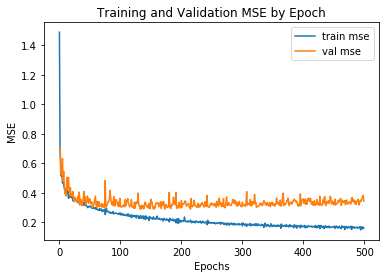

In [104]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'], label = "train mse")
plt.plot(hist['epoch'], hist['val_mse'], label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [105]:
import numpy as np
def smooth_curve(values, std=5):
    # gaussian smoothing: Smooths a list of values by convolving with a gussian.
    width = std * 4
    x = np.linspace(-width, width, 2 * width + 1)
    kernel = np.exp(-(x / 5)**2)

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode='same')
    smoothed_weights = np.convolve(weights, kernel, mode='same')

    return smoothed_values / smoothed_weights

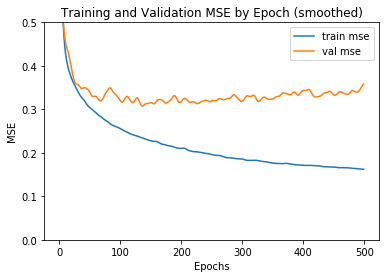

In [106]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], smooth_curve(hist['mse']), label = "train mse")
plt.plot(hist['epoch'], smooth_curve(hist['val_mse']), label = "val mse")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim((0, 0.5)) 
# Set a title of the current axes.
plt.title('Training and Validation MSE by Epoch (smoothed)')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Final fit model with full data & test model

In [109]:
model = build_model()
model.fit(normed_train_data, train_targets, epochs=150, batch_size=1024, verbose=1)

Train on 16512 samples
Epoch 1/150
16512/16512 [==============================] - 0s 30us/sample - loss: 1.2493 - mae: 0.8045 - mse: 1.2493
Epoch 2/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.6095 - mae: 0.5658 - mse: 0.6095
Epoch 3/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.5845 - mae: 0.5558 - mse: 0.5845
Epoch 4/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.5125 - mae: 0.5181 - mse: 0.5125
Epoch 5/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.4864 - mae: 0.5025 - mse: 0.4864
Epoch 6/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.4482 - mae: 0.4795 - mse: 0.4482
Epoch 7/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.4563 - mae: 0.4874 - mse: 0.4563
Epoch 8/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.4441 - mae: 0.4747 - mse: 0.4441
Epoch 9/150
16512/16512 [=======================

16512/16512 [==============================] - 0s 5us/sample - loss: 0.2220 - mae: 0.3243 - mse: 0.2220
Epoch 140/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2316 - mae: 0.3338 - mse: 0.2316
Epoch 141/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2289 - mae: 0.3342 - mse: 0.2289
Epoch 142/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2221 - mae: 0.3271 - mse: 0.2221
Epoch 143/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2291 - mae: 0.3302 - mse: 0.2291
Epoch 144/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2171 - mae: 0.3234 - mse: 0.2171
Epoch 145/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2290 - mae: 0.3309 - mse: 0.2290
Epoch 146/150
16512/16512 [==============================] - 0s 5us/sample - loss: 0.2263 - mae: 0.3296 - mse: 0.2263
Epoch 147/150
16512/16512 [==============================] - 0s 5us/sa

In [110]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

0.30648965

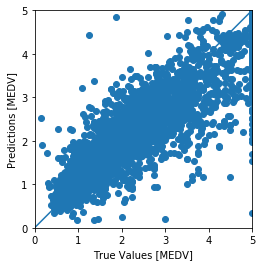

In [26]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)